# Prieskumná analýza testovacích dát pre bakalársku prácu
Autor: Peter Brenkus

Dáta boli zbierané v kolách, ktoré sa konali v rôznych časoch (približne): 6:00, 12:00, 18:00 a 24:00 

### Test času odozvy:
V každom kole sa vykonali tri testy:
- 1) bez použitia cache mechanizmov
- 2) za použitia štandardnej GET cache na strane NGINX webového servera,
- 3) za použitia vyššie uvedenej cache + mojej POST cache

### Test priepustnosti:
V každom kole sa vykonali tri testy:
- 1) bez použitia cache mechanizmov
- 2) za použitia mojej POST cache

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Načítanie dát z datasetov

In [2]:
no_cache_6 = pd.read_csv("raw_data/results_10_05_06_29.csv", delimiter=";")
get_cache_6 = pd.read_csv("raw_data/results_10_05_06_32.csv", delimiter=";")
both_cache_6 = pd.read_csv("raw_data/results_10_05_06_35.csv", delimiter=";")

no_cache_12 = pd.read_csv("raw_data/results_10_05_12_11.csv", delimiter=";")
get_cache_12 = pd.read_csv("raw_data/results_10_05_12_14.csv", delimiter=";")
both_cache_12 = pd.read_csv("raw_data/results_10_05_12_16.csv", delimiter=";")

no_cache_18 = pd.read_csv("raw_data/results_10_05_18_08.csv", delimiter=";")
get_cache_18 = pd.read_csv("raw_data/results_10_05_18_11.csv", delimiter=";")
both_cache_18 = pd.read_csv("raw_data/results_10_05_18_13.csv", delimiter=";")

no_cache_24 = pd.read_csv("raw_data/results_09_05_23_24.csv", delimiter=";")
get_cache_24 = pd.read_csv("raw_data/results_09_05_23_27.csv", delimiter=";")
both_cache_24 = pd.read_csv("raw_data/results_09_05_23_32.csv", delimiter=";")

throughput = pd.read_csv("raw_data/throughput_summary.csv", delimiter=";")

# TEST ČASU ODOZVY

## Overenie dát

In [3]:
print(f" no_cache_6: {no_cache_6.shape}, get_cache_6: {get_cache_6.shape}, both_cache_6: {both_cache_6.shape}\n \
no_cache_12: {no_cache_12.shape}, get_cache_12: {get_cache_12.shape}, both_cache_12: {both_cache_12.shape}\n \
no_cache_18: {no_cache_18.shape}, get_cache_18: {get_cache_18.shape}, both_cache_18: {both_cache_18.shape}\n \
no_cache_24: {no_cache_24.shape}, get_cache_24: {get_cache_24.shape}, both_cache_24: {both_cache_24.shape}")


 no_cache_6: (1000, 5), get_cache_6: (1000, 5), both_cache_6: (1000, 5)
 no_cache_12: (1000, 5), get_cache_12: (1000, 5), both_cache_12: (1000, 5)
 no_cache_18: (1000, 5), get_cache_18: (1000, 5), both_cache_18: (1000, 5)
 no_cache_24: (1000, 5), get_cache_24: (1000, 5), both_cache_24: (1000, 5)


Vidíme, že každý dataset má 1000 riadkov a 5 stĺpcov s hondotami.

In [4]:
datasets = {
    'no_cache_6': no_cache_6,
    'get_cache_6': get_cache_6,
    'both_cache_6': both_cache_6,
    'no_cache_12': no_cache_12,
    'get_cache_12': get_cache_12,
    'both_cache_12': both_cache_12,
    'no_cache_18': no_cache_18,
    'get_cache_18': get_cache_18,
    'both_cache_18': both_cache_18,
    'no_cache_24': no_cache_24,
    'get_cache_24': get_cache_24,
    'both_cache_24': both_cache_24
}

for name, df in datasets.items():
    missing_values = df.isnull().sum().sum()
    print(f"{name}: {missing_values} chýbajúcich hodnôt")

no_cache_6: 0 chýbajúcich hodnôt
get_cache_6: 0 chýbajúcich hodnôt
both_cache_6: 0 chýbajúcich hodnôt
no_cache_12: 0 chýbajúcich hodnôt
get_cache_12: 0 chýbajúcich hodnôt
both_cache_12: 0 chýbajúcich hodnôt
no_cache_18: 0 chýbajúcich hodnôt
get_cache_18: 0 chýbajúcich hodnôt
both_cache_18: 0 chýbajúcich hodnôt
no_cache_24: 0 chýbajúcich hodnôt
get_cache_24: 0 chýbajúcich hodnôt
both_cache_24: 0 chýbajúcich hodnôt


Tu vidíme, že v žiadnom datasete nie sú chýbajúce hodnoty.

In [5]:
print(both_cache_12.head())

  METHOD  TIME_MS X-PROXY-CACHE OCSP-CACHE CERT_STATUS
0    GET      383          MISS       MISS        good
1   POST       43             x        HIT        good
2    GET       12           HIT       MISS        good
3   POST       37             x        HIT        good
4    GET       17           HIT       MISS        good


Náhľad na to, ako datasety vyzerajú.

In [6]:
for dataset_name, dataframe in datasets.items():
    print(f"\nDataset: {dataset_name}")
    print(f"Unikátne statusy: {dataframe['CERT_STATUS'].unique()}")


Dataset: no_cache_6
Unikátne statusy: ['good']

Dataset: get_cache_6
Unikátne statusy: ['good']

Dataset: both_cache_6
Unikátne statusy: ['good']

Dataset: no_cache_12
Unikátne statusy: ['good']

Dataset: get_cache_12
Unikátne statusy: ['good']

Dataset: both_cache_12
Unikátne statusy: ['good']

Dataset: no_cache_18
Unikátne statusy: ['good']

Dataset: get_cache_18
Unikátne statusy: ['good']

Dataset: both_cache_18
Unikátne statusy: ['good']

Dataset: no_cache_24
Unikátne statusy: ['good']

Dataset: get_cache_24
Unikátne statusy: ['good']

Dataset: both_cache_24
Unikátne statusy: ['good']


Tu môžeme vidieť, že všetky odpovede na požiadavky boli klientom úspešne rozparsované a jediný stav certifikátu v nich bol platný.

## Štatistiky a zobrazenie

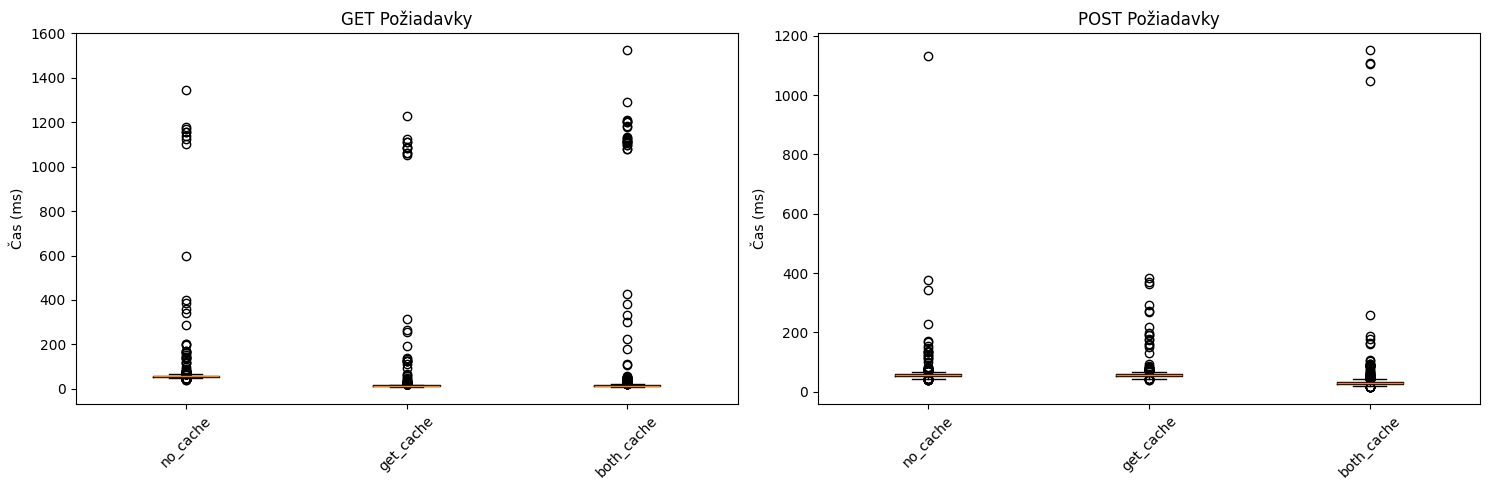

In [7]:
datasety = ["no_cache", "get_cache", "both_cache"]

no_cache = pd.concat([no_cache_6, no_cache_12, no_cache_18, no_cache_24])
get_cache = pd.concat([get_cache_6, get_cache_12, get_cache_18, get_cache_24])
both_cache = pd.concat([both_cache_6, both_cache_12, both_cache_18, both_cache_24])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

get_data = []
get_labels = []
for ds in datasety :
    data = eval(ds)[eval(ds)['METHOD'] == 'GET']['TIME_MS']
    get_data.append(data)
    get_labels.append(ds.replace('_clean', ''))

post_data = []
post_labels = []
for ds in datasety:
    data = eval(ds)[eval(ds)['METHOD'] == 'POST']['TIME_MS']
    post_data.append(data)
    post_labels.append(ds.replace('_clean', ''))

ax1.boxplot(get_data, tick_labels=get_labels)  
ax1.set_title('GET Požiadavky')
ax1.set_ylabel('Čas (ms)')
ax1.tick_params(axis='x', rotation=45)

ax2.boxplot(post_data, tick_labels=post_labels) 
ax2.set_title('POST Požiadavky')
ax2.set_ylabel('Čas (ms)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

V prvom zobrazení vidíme, že grafy sú veľmi skreslené vychýlenými hodnotami.

In [8]:
for ds in datasety:
    print(f"{ds}:")
    
    for method in ['GET', 'POST']:
        data = eval(ds)[eval(ds)['METHOD'] == method]['TIME_MS']
        
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        
        outliers = ((data < (Q1 - 1.5 * IQR)) | 
                   (data > (Q3 + 1.5 * IQR)))
        
        outliers_count = outliers.sum()
        print(f"  {method}: {outliers_count} outliers")

no_cache:
  GET: 196 outliers
  POST: 105 outliers
get_cache:
  GET: 154 outliers
  POST: 59 outliers
both_cache:
  GET: 98 outliers
  POST: 75 outliers


Výstup funkcie ukazuje, koľko vychýlených hodnôt má každý dataset.

In [9]:
def modify_outliers(df):
    cleaned_data = df.copy()
    
    for method in ['GET', 'POST']:
        mask = cleaned_data['METHOD'] == method
        data = cleaned_data.loc[mask, 'TIME_MS'].astype('int64')
        
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        clipped_data = data.clip(lower=lower_bound, upper=upper_bound).astype('int64')
        cleaned_data.loc[mask, 'TIME_MS'] = clipped_data
    
    return cleaned_data

no_cache_clean = modify_outliers(no_cache)
get_cache_clean = modify_outliers(get_cache)
both_cache_clean = modify_outliers(both_cache)

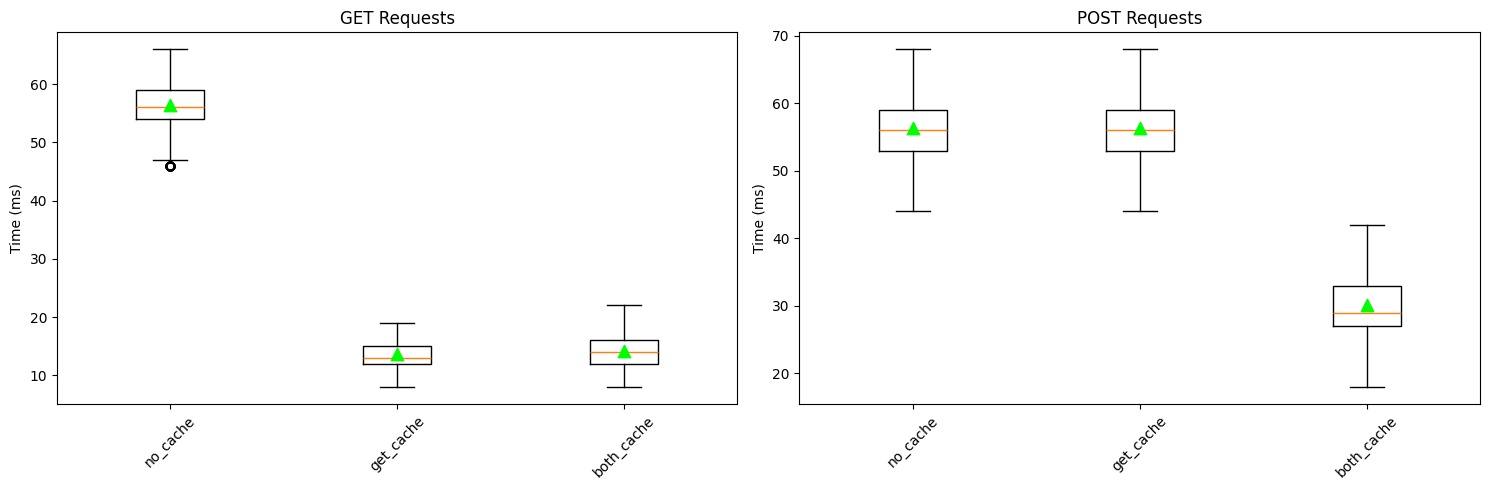

In [10]:
vycistene_datasety = ["no_cache_clean", "get_cache_clean", "both_cache_clean"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
get_data = []
get_labels = []
for ds in vycistene_datasety:
    data = eval(ds)[eval(ds)['METHOD'] == 'GET']['TIME_MS']
    get_data.append(data)
    get_labels.append(ds.replace('_clean', ''))

post_data = []
post_labels = []
for ds in vycistene_datasety:
    data = eval(ds)[eval(ds)['METHOD'] == 'POST']['TIME_MS']
    post_data.append(data)
    post_labels.append(ds.replace('_clean', ''))

for i, data in enumerate(get_data):
    mean = data.mean()
    ax1.scatter(i+1, mean, marker='^', color='lime', s=80, zorder=3)

for i, data in enumerate(post_data):
    mean = data.mean()
    ax2.scatter(i+1, mean, marker='^', color='lime', s=80, zorder=3)

ax1.boxplot(get_data, tick_labels=get_labels)  
ax1.set_title('GET Requests')
ax1.set_ylabel('Time (ms)')
ax1.tick_params(axis='x', rotation=45)

ax2.boxplot(post_data, tick_labels=post_labels) 
ax2.set_title('POST Requests')
ax2.set_ylabel('Time (ms)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Po nahradení vychýlených hodnôt hraničnými hodnotami dostávame čitateľnejšie zobrazenie testovacích dát.

In [11]:
for ds in vycistene_datasety:
    print(f"\n------------- Štatistiky pre dataset: {ds} -------------\n")

    get_data =eval(ds)[eval(ds)['METHOD'] == 'GET']['TIME_MS']
    print(f"GET:")
    print(f"                Priemer: {get_data.mean():.2f} ms")
    print(f"                Medián: {get_data.median():.2f} ms")
    print(f"                Štandardná odchýlka: {get_data.std():.2f} ms")

    post_data = eval(ds)[eval(ds)['METHOD'] == 'POST']['TIME_MS']
    print(f"POST:")
    print(f"                Priemer: {post_data.mean():.2f} ms")
    print(f"                Medián: {post_data.median():.2f} ms")  # Add this line
    print(f"                Štandardná odchýlka: {post_data.std():.2f} ms")



------------- Štatistiky pre dataset: no_cache_clean -------------

GET:
                Priemer: 56.46 ms
                Medián: 56.00 ms
                Štandardná odchýlka: 4.89 ms
POST:
                Priemer: 56.38 ms
                Medián: 56.00 ms
                Štandardná odchýlka: 5.42 ms

------------- Štatistiky pre dataset: get_cache_clean -------------

GET:
                Priemer: 13.73 ms
                Medián: 13.00 ms
                Štandardná odchýlka: 2.74 ms
POST:
                Priemer: 56.34 ms
                Medián: 56.00 ms
                Štandardná odchýlka: 4.52 ms

------------- Štatistiky pre dataset: both_cache_clean -------------

GET:
                Priemer: 14.20 ms
                Medián: 14.00 ms
                Štandardná odchýlka: 3.10 ms
POST:
                Priemer: 30.16 ms
                Medián: 29.00 ms
                Štandardná odchýlka: 4.72 ms


# TEST PRIEPUSTNOSTI

## Overenie a príprava dát

In [12]:
print("\nPočet chýbajúcich hodnôt v každom stĺpci:")
print(throughput.isnull().sum())


Počet chýbajúcich hodnôt v každom stĺpci:
Timestamp                 0
TotalAttempts             0
SuccessfulHTTP            0
FailedHTTP                0
ValidOCSP                 0
InvalidOCSP               0
ProcessedOCSPResponses    0
RequestsPerMinute         0
ActualDurationSec         0
TargetDurationSec         0
Concurrency               0
Method                    0
OCSPCache                 0
dtype: int64


Tu vidíme, že v žiadnom stĺpci nie sú chýbajúce hodnoty.

In [13]:
print("\nNáhľad na obsah datasetu:")
print(throughput.head(6))


Náhľad na obsah datasetu:
        Timestamp  TotalAttempts  SuccessfulHTTP  FailedHTTP  ValidOCSP  \
0  9.5.2025 23:37           1497            1497           0       1497   
1  9.5.2025 23:38           1588            1588           0       1588   
2  9.5.2025 23:39           1792            1792           0       1792   
3  9.5.2025 23:40           2735            2735           0       2735   
4  9.5.2025 23:41           2905            2905           0       2905   
5  9.5.2025 23:42           3231            3231           0       3231   

   InvalidOCSP  ProcessedOCSPResponses  RequestsPerMinute  ActualDurationSec  \
0            0                    1497            2994.00                 30   
1            0                    1588            3176.00                 30   
2            0                    1792            3584.00                 30   
3            0                    2735            5293.55                 31   
4            0                    2905         

In [14]:
print("\n------------- Kontrola a úprava InvalidOCSP -------------")
throughput_modified = throughput.copy()
invalid_ocsp_indices = throughput_modified[throughput_modified['InvalidOCSP'] > 0].index

if not invalid_ocsp_indices.empty:
    print(f"Nájdené riadky s InvalidOCSP > 0 (počet: {len(invalid_ocsp_indices)}):")
    print(throughput_modified.loc[invalid_ocsp_indices, ['ProcessedOCSPResponses', 'InvalidOCSP']])

    throughput_modified.loc[invalid_ocsp_indices, 'ProcessedOCSPResponses'] = \
        throughput_modified.loc[invalid_ocsp_indices, 'ProcessedOCSPResponses'] - \
        throughput_modified.loc[invalid_ocsp_indices, 'InvalidOCSP']

    throughput_modified.loc[invalid_ocsp_indices, 'InvalidOCSP'] = 0

    print("Upravené hodnoty v dotknutých riadkoch:")
    print(throughput_modified.loc[invalid_ocsp_indices, ['ProcessedOCSPResponses', 'InvalidOCSP']])



------------- Kontrola a úprava InvalidOCSP -------------
Nájdené riadky s InvalidOCSP > 0 (počet: 1):
    ProcessedOCSPResponses  InvalidOCSP
15                    2696            1
Upravené hodnoty v dotknutých riadkoch:
    ProcessedOCSPResponses  InvalidOCSP
15                    2695            0


In [15]:
print("\n------------- Rozdelenie datasetu -------------")
throughput_cache_yes = throughput_modified[throughput_modified['OCSPCache'] == 'yes']
throughput_cache_no = throughput_modified[throughput_modified['OCSPCache'] == 'no']

print(f"Počet riadkov s OCSPCache='yes': {throughput_cache_yes.shape[0]}")
print(f"Počet riadkov s OCSPCache='no': {throughput_cache_no.shape[0]}")


------------- Rozdelenie datasetu -------------
Počet riadkov s OCSPCache='yes': 12
Počet riadkov s OCSPCache='no': 12


In [16]:
print("\n------------- Priemerné ProcessedOCSPResponses -------------")

if not throughput_cache_yes.empty:
    avg_processed_yes = throughput_cache_yes['ProcessedOCSPResponses'].mean()
    print(f"Priemerný počet spracovaných OCSP odpovedí (OCSPCache='yes'): {avg_processed_yes:.2f}")

if not throughput_cache_no.empty:
    avg_processed_no = throughput_cache_no['ProcessedOCSPResponses'].mean()
    print(f"Priemerný počet spracovaných OCSP odpovedí (OCSPCache='no'): {avg_processed_no:.2f}")


------------- Priemerné ProcessedOCSPResponses -------------
Priemerný počet spracovaných OCSP odpovedí (OCSPCache='yes'): 2994.25
Priemerný počet spracovaných OCSP odpovedí (OCSPCache='no'): 1626.42


## Štatistiky a zobrazenie

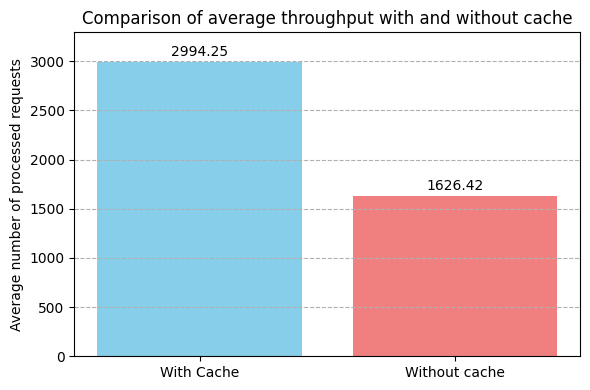

In [17]:
labels = ['With Cache', 'Without cache']
averages = [avg_processed_yes, avg_processed_no]
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(6, 4)) 
bars = plt.bar(labels, averages, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + (0.01 * max(averages)), f'{yval:.2f}', ha='center', va='bottom')


plt.ylabel('Average number of processed requests')
plt.title('Comparison of average throughput with and without cache')
plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='--') 
current_ylim = plt.gca().get_ylim() 
new_top_ylim = max(averages) * 1.1
plt.ylim(bottom=current_ylim[0], top=new_top_ylim)
plt.tight_layout() 
plt.show()

In [18]:
print("\n------------- Percentuálny nárast spracovaných požiadaviek s cache -------------")
if avg_processed_no > 0:
    percentage_increase = ((avg_processed_yes - avg_processed_no) / avg_processed_no) * 100
    print(f"S cache sa spracovalo priemerne o {percentage_increase:.2f}% viac OCSP odpovedí ako bez cache.")


------------- Percentuálny nárast spracovaných požiadaviek s cache -------------
S cache sa spracovalo priemerne o 84.10% viac OCSP odpovedí ako bez cache.
